# Input packages and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('airlines_delay.csv')

# Preprocessing


In [3]:
data.keys()

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'DEP_BLOCK',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498937 entries, 0 to 498936
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          498937 non-null  int64  
 1   DAY_OF_WEEK                    498937 non-null  int64  
 2   DEP_DEL15                      498937 non-null  int64  
 3   DISTANCE_GROUP                 498937 non-null  int64  
 4   DEP_BLOCK                      498937 non-null  object 
 5   SEGMENT_NUMBER                 498937 non-null  int64  
 6   CONCURRENT_FLIGHTS             498937 non-null  int64  
 7   NUMBER_OF_SEATS                498937 non-null  int64  
 8   CARRIER_NAME                   498937 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          498937 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          498937 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  498937 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

In [5]:
data.nunique()

MONTH                              1
DAY_OF_WEEK                        7
DEP_DEL15                          2
DISTANCE_GROUP                    11
DEP_BLOCK                          6
SEGMENT_NUMBER                    14
CONCURRENT_FLIGHTS               249
NUMBER_OF_SEATS                   78
CARRIER_NAME                      17
AIRPORT_FLIGHTS_MONTH             87
AIRLINE_FLIGHTS_MONTH             17
AIRLINE_AIRPORT_FLIGHTS_MONTH    529
AVG_MONTHLY_PASS_AIRPORT          88
AVG_MONTHLY_PASS_AIRLINE          17
FLT_ATTENDANTS_PER_PASS           14
GROUND_SERV_PER_PASS              17
PLANE_AGE                         33
DEPARTING_AIRPORT                 88
LATITUDE                          88
LONGITUDE                         88
PREVIOUS_AIRPORT                 343
PRCP                             124
SNOW                              41
SNWD                              15
TMAX                              89
AWND                              99
dtype: int64

In [6]:
data.DISTANCE_GROUP.unique()

array([ 1,  3,  2,  5, 10,  6,  9,  8,  4,  7, 11], dtype=int64)

In [7]:
data.DEP_BLOCK.unique()

array(['MORNING', 'EARLY_MORNING', 'MIDDAY', 'EVENING', 'AFTERNOON',
       'LATE_NIGHT'], dtype=object)

In [8]:
data.CARRIER_NAME.unique()

array(['Mesa Airlines Inc.', 'American Airlines Inc.',
       'Southwest Airlines Co.', 'United Air Lines Inc.',
       'Delta Air Lines Inc.', 'Spirit Air Lines', 'JetBlue Airways',
       'Endeavor Air Inc.', 'Midwest Airline, Inc.',
       'Frontier Airlines Inc.', 'American Eagle Airlines Inc.',
       'Alaska Airlines Inc.', 'Comair Inc.', 'SkyWest Airlines Inc.',
       'Allegiant Air', 'Atlantic Southeast Airlines',
       'Hawaiian Airlines Inc.'], dtype=object)

In [9]:
data.DEPARTING_AIRPORT.unique()

array(['Raleigh-Durham International', 'Washington Dulles International',
       "Chicago O'Hare International", 'Des Moines Municipal',
       'Newark Liberty International', 'Salt Lake City International',
       'Los Angeles International', 'San Francisco International',
       'Jacksonville International', 'Houston Intercontinental',
       'Phoenix Sky Harbor International', 'Stapleton International',
       'Tucson International', 'Orlando International', 'Truax Field',
       'Indianapolis Muni/Weir Cook', 'Birmingham Airport',
       'Reno/Tahoe International', 'Will Rogers World',
       'Seattle International', 'Greenville-Spartanburg',
       'Fort Lauderdale-Hollywood International',
       'San Diego International Lindbergh Fl',
       'Austin - Bergstrom International', 'Douglas Municipal',
       'McCarran International',
       'Louis Armstrong New Orleans International',
       'Honolulu International', 'Miami International',
       'Dallas Fort Worth Regional', 'Cleve

In [10]:
data.PREVIOUS_AIRPORT.unique()

array(['NONE', "Chicago O'Hare International",
       'Newark Liberty International', 'San Francisco International',
       'Logan International', 'Houston Intercontinental',
       'Port Columbus International', 'Los Angeles International',
       'Philadelphia International', 'Stapleton International',
       'Bradley International', 'Jacksonville International', 'LaGuardia',
       'Tampa International',
       'Cincinnati/Northern Kentucky International',
       'Detroit Metro Wayne County', 'Minneapolis-St Paul International',
       'Douglas Municipal', 'Atlanta Municipal',
       'Louis Armstrong New Orleans International',
       'Washington Dulles International', 'Seattle International',
       'Dallas Fort Worth Regional', 'Miami International',
       'Ronald Reagan Washington National',
       'John F. Kennedy International', 'Orlando International',
       'Salt Lake City International',
       'Fort Lauderdale-Hollywood International',
       'Nashville International', 'C

In [11]:
data.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,498937.0,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,...,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000,498937.000000
mean,1.0,3.944131,0.135700,3.827353,2.982605,89.186108,134.012214,12508.629414,60784.257107,3335.887224,...,0.000508,0.000706,11.256918,36.269367,-95.213125,0.084246,0.047395,0.144397,56.380115,8.202474
std,0.0,1.909869,0.342471,2.352901,1.719572,65.603203,47.168299,8552.964096,32969.107826,4095.156274,...,0.000459,0.000258,7.072804,5.604808,18.180227,0.237113,0.304972,0.783998,14.957980,4.003184
min,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,1103.000000,7018.000000,1.000000,...,0.000000,0.000033,0.000000,18.440000,-159.346000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,0.000000,2.000000,2.000000,35.000000,79.000000,5019.000000,24691.000000,629.000000,...,0.000170,0.000541,5.000000,32.899000,-111.967000,0.000000,0.000000,0.000000,45.000000,5.140000
50%,1.0,4.000000,0.000000,3.000000,3.000000,77.000000,143.000000,11479.000000,69699.000000,2084.000000,...,0.000338,0.000616,12.000000,36.127000,-87.906000,0.000000,0.000000,0.000000,57.000000,7.380000
75%,1.0,5.000000,0.000000,5.000000,4.000000,124.000000,173.000000,17680.000000,80026.000000,4681.000000,...,0.000768,0.000911,17.000000,40.639000,-80.936000,0.020000,0.000000,0.000000,67.000000,10.510000
max,1.0,7.000000,1.000000,11.000000,14.000000,286.000000,337.000000,32102.000000,107849.000000,19461.000000,...,0.001759,0.001265,32.000000,61.169000,-66.002000,3.020000,7.000000,14.200000,88.000000,25.050000


<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

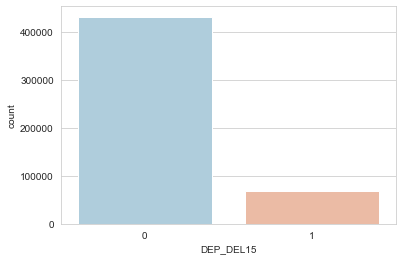

In [12]:
#Apakah data kita imbalance?

sns.set_style('whitegrid')
sns.countplot(x=data['DEP_DEL15'],data=data,palette='RdBu_r')

## Cleaning

In [13]:
data=data.drop(columns="MONTH")

In [14]:
data.head(5)

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,0,1,MORNING,1,49,66,Mesa Airlines Inc.,5021,17541,...,17,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
1,1,0,3,EARLY_MORNING,1,8,128,American Airlines Inc.,5021,75591,...,19,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
2,1,0,2,MORNING,1,49,99,American Airlines Inc.,5021,75591,...,11,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
3,1,0,1,EARLY_MORNING,1,8,99,American Airlines Inc.,5021,75591,...,11,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37
4,1,0,3,MORNING,1,49,143,Southwest Airlines Co.,5021,107849,...,8,Raleigh-Durham International,35.875,-78.782,NONE,0.46,0.0,0.0,67.0,5.37


In [24]:
datagraph=data.drop(['DEP_BLOCK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT'], axis = 1)

In [28]:
halfdata = datagraph.iloc[0:50,:].values
pd.DataFrame(halfdata, columns = ['Name', 'Age'])

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
#sns.heatmap(datagraph, annot=True)

### Dummies

In [18]:
print("Provinsi  Jumlah")
datatrain["Provinsi"].value_counts(sort=False)

Provinsi  Jumlah


11    631
12    959
13    503
14    353
15    236
16    411
17    214
18    460
19    167
21    154
31    193
32    892
33    966
34     95
35    953
36    282
51    210
52    320
53    648
61    355
62    326
63    302
64    236
65    132
71    289
72    307
73    666
74    479
75    132
76    193
81    344
82    254
91    379
94    585
Name: Provinsi, dtype: int64

In [19]:
#prov = pd.get_dummies(datatrain["Provinsi"])

In [20]:
#datatrain = pd.concat([prov,datatrain.drop(columns="Provinsi")], axis=1)

In [21]:
#datatrain

# Graph

### Umur

<AxesSubplot:xlabel='X2', ylabel='Count'>

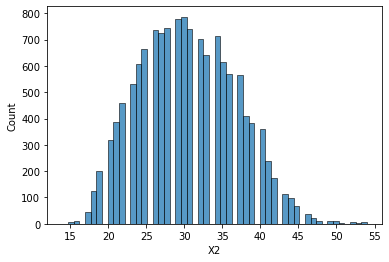

In [22]:
sns.histplot(datatrain["X2"])

In [23]:
datatrainage1 = datatrain[datatrain["X2"] < 24]
datatrainage2 = datatrain[(datatrain["X2"] < 34) & (datatrain["X2"] > 23)]
datatrainage3 = datatrain[(datatrain["X2"] < 44) & (datatrain["X2"] > 33)]
datatrainage4 = datatrain[(datatrain["X2"] < 55) & (datatrain["X2"] > 43)]

<AxesSubplot:xlabel='X2', ylabel='Count'>

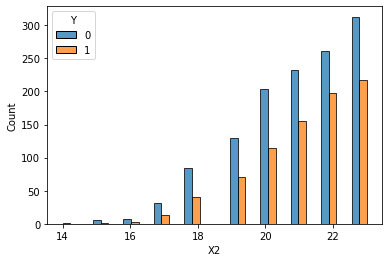

In [25]:
sns.histplot(data=datatrainage1, x="X2", multiple="dodge", hue ="Y")

<AxesSubplot:xlabel='X2', ylabel='Count'>

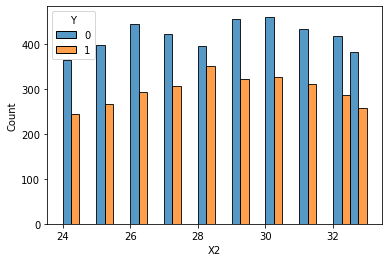

In [26]:
sns.histplot(data=datatrainage2, x="X2", multiple="dodge", hue ="Y")

<AxesSubplot:xlabel='X2', ylabel='Count'>

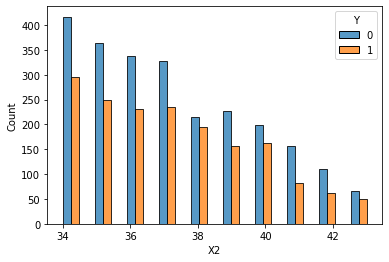

In [27]:
sns.histplot(data=datatrainage3, x="X2", multiple="dodge", hue ="Y")

<AxesSubplot:xlabel='X2', ylabel='Count'>

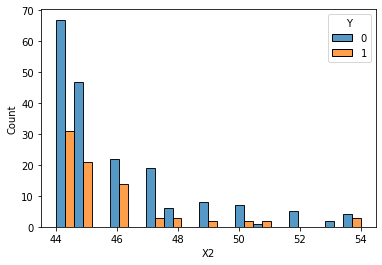

In [28]:
sns.histplot(data=datatrainage4, x="X2", multiple="dodge", hue ="Y")

In [29]:
YXage1 = pd.crosstab(index=datatrainage1["X2"], 
                           columns=datatrainage1["Y"])
YXage1/len(datatrainage1)*100

Y,0,1
X2,,
14,0.048008,0.000000
15,0.240038,0.048008
16,0.384061,0.144023
17,1.536246,0.672108
18,4.032645,1.920307
19,6.192991,3.360538
20,9.793567,5.472876
21,11.185790,7.441191
22,12.530005,9.505521


In [30]:
YXage2 = pd.crosstab(index=datatrainage2["X2"], 
                           columns=datatrainage2["Y"])
YXage2/len(datatrainage2)*100

Y,0,1
X2,,
24,5.103042,3.434740
25,5.579700,3.743166
26,6.210571,4.107669
27,5.902145,4.289920
28,5.537642,4.920791
29,6.392822,4.514230
30,6.448899,4.584326
31,6.056358,4.345997
32,5.846068,4.009533


In [31]:
YXage3 = pd.crosstab(index=datatrainage3["X2"], 
                           columns=datatrainage3["Y"])
YXage3/len(datatrainage3)*100

Y,0,1
X2,,
34,10.070031,7.123883
35,8.814296,6.037189
36,8.138131,5.602511
37,7.920792,5.699106
38,5.191983,4.709007
39,5.481768,3.767206
40,4.781454,3.936247
41,3.791355,1.980198
42,2.656363,1.521372


In [32]:
YXage4 = pd.crosstab(index=datatrainage4["X2"], 
                           columns=datatrainage4["Y"])
YXage4/len(datatrainage4)*100

Y,0,1
X2,,
44,24.907063,11.524164
45,17.472119,7.806691
46,8.178439,5.204461
47,7.063197,1.115242
48,2.230483,1.115242
49,2.973978,0.743494
50,2.602230,0.743494
51,0.371747,0.743494
52,1.858736,0.000000


### Count Table

In [33]:
YX1 = pd.crosstab(index=datatrain["X1"], 
                           columns=datatrain["Y"])
YX1.index= ["Kota","Desa"]
YX1/len(datatrain)*100

Y,0,1
Kota,21.194775,17.730809
Desa,37.854102,23.220314


In [34]:
YX3 = pd.crosstab(index=datatrain["X3"], 
                           columns=datatrain["Y"])
YX3.index= ["di bawah SMP","di atas SMP"]
YX3/len(datatrain)*100

Y,0,1
di bawah SMP,31.293116,19.925143
di atas SMP,27.755761,21.025980


In [35]:
YX4 = pd.crosstab(index=datatrain["X4"], 
                           columns=datatrain["Y"])
YX4.index= ["Tidak Kerja","Kerja"]
YX4/len(datatrain)*100

Y,0,1
Tidak Kerja,34.881844,24.937619
Kerja,24.167034,16.013504


In [36]:
YX5 = pd.crosstab(index=datatrain["X5"], 
                           columns=datatrain["Y"])
YX5.index= ["Bukan Faskes","Faskes"]
YX5/len(datatrain)*100

Y,0,1
Bukan Faskes,14.501688,4.146485
Faskes,44.547189,36.804638


In [37]:
YX6 = pd.crosstab(index=datatrain["X6"], 
                           columns=datatrain["Y"])
YX6.index= ["Miskin","Tidak Miskin"]
YX6/len(datatrain)*100

Y,0,1
Miskin,8.212241,4.197857
Tidak Miskin,50.836636,36.753266


### Countplot

<AxesSubplot:xlabel='Y', ylabel='count'>

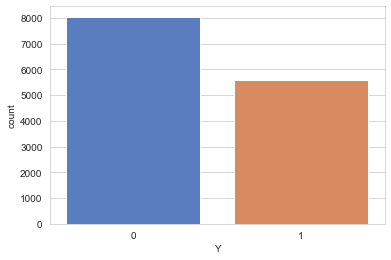

In [38]:
sns.set_style('whitegrid')
sns.countplot(x=datatrain['Y'],data=datatrain,palette='muted')

<AxesSubplot:xlabel='X1', ylabel='count'>

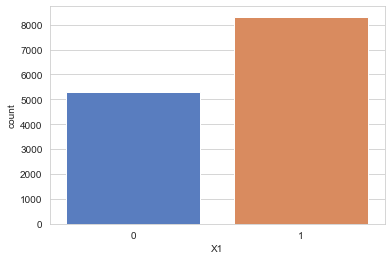

In [39]:
sns.set_style('whitegrid')
sns.countplot(x=datatrain['X1'],data=datatrain,palette='muted')

<AxesSubplot:xlabel='X3', ylabel='count'>

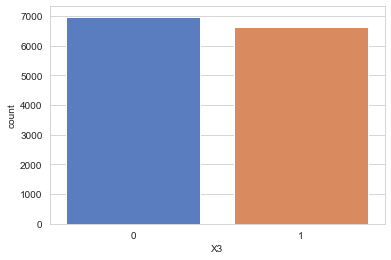

In [40]:
sns.set_style('whitegrid')
sns.countplot(x=datatrain['X3'],data=datatrain,palette='muted')

<AxesSubplot:xlabel='X4', ylabel='count'>

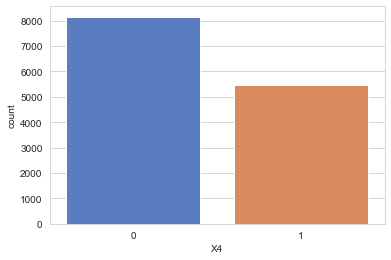

In [41]:
sns.set_style('whitegrid')
sns.countplot(x=datatrain['X4'],data=datatrain,palette='muted')

<AxesSubplot:xlabel='X5', ylabel='count'>

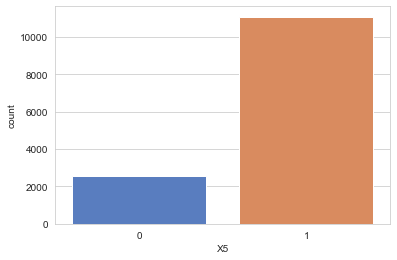

In [42]:
sns.set_style('whitegrid')
sns.countplot(x=datatrain['X5'],data=datatrain,palette='muted')

<AxesSubplot:xlabel='X6', ylabel='count'>

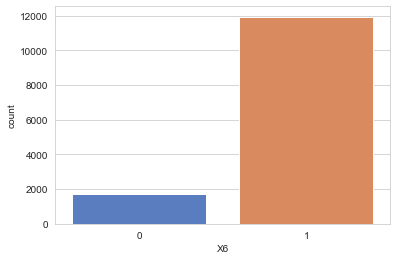

In [43]:
sns.set_style('whitegrid')
sns.countplot(x=datatrain['X6'],data=datatrain,palette='muted')

In [44]:
datatrain.groupby(["Y","X1"]).X3.value_counts()/len(datatrain)*100

Y  X1  X3
0  0   1     13.048584
       0      8.146191
   1   0     23.146925
       1     14.707177
1  0   1     11.096433
       0      6.634375
   1   0     13.290768
       1      9.929546
Name: X3, dtype: float64

In [45]:
datatrain.groupby(["Y","X1"]).X5.value_counts()/len(datatrain)*100

Y  X1  X5
0  0   1     19.051813
       0      2.142962
   1   1     25.495376
       0     12.358726
1  0   1     16.879495
       0      0.851314
   1   1     19.925143
       0      3.295171
Name: X5, dtype: float64

In [46]:
datatrain.groupby(["Y","X3"]).X5.value_counts()/len(datatrain)*100

Y  X3  X5
0  0   1     20.827829
       0     10.465287
   1   1     23.719360
       0      4.036401
1  0   1     17.261118
       0      2.664025
   1   1     19.543520
       0      1.482460
Name: X5, dtype: float64

In [47]:
datatrain.groupby(["Y","X3"]).X6.value_counts()/len(datatrain)*100

Y  X3  X6
0  0   1     25.165125
       0      6.127991
   1   1     25.671510
       0      2.084251
1  0   1     16.894173
       0      3.030970
   1   1     19.859093
       0      1.166887
Name: X6, dtype: float64

In [68]:
datatrainee = datatrain[(datatrain["X5"] == 1) & (datatrain["X3"] == 0)]
datatrainee.Y.value_counts()

0    2838
1    2352
Name: Y, dtype: int64

### Boxplot

<AxesSubplot:xlabel='Y', ylabel='X2'>

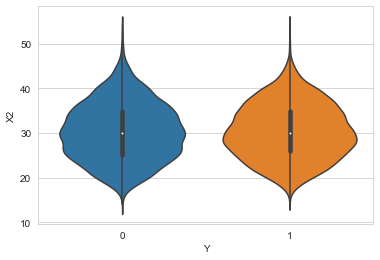

In [69]:
sns.violinplot(x=datatrain.Y , y=datatrain.X2)

<AxesSubplot:xlabel='Y', ylabel='Z1'>

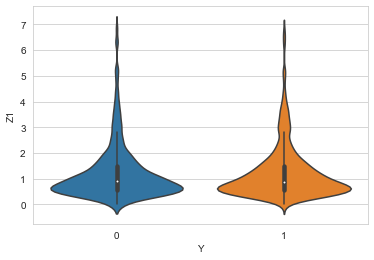

In [70]:
sns.violinplot(x=datatrain.Y , y=datatrain.Z1)

<AxesSubplot:xlabel='Y', ylabel='Z2'>

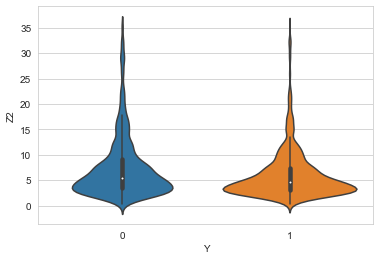

In [71]:
sns.violinplot(x=datatrain.Y , y=datatrain.Z2)

<AxesSubplot:xlabel='Y', ylabel='Z3'>

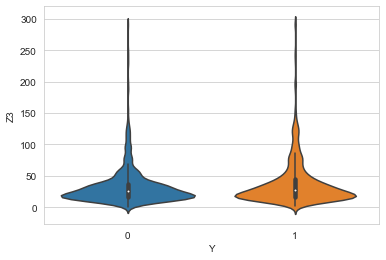

In [72]:
sns.violinplot(x=datatrain.Y , y=datatrain.Z3)

<AxesSubplot:xlabel='Y', ylabel='Z4'>

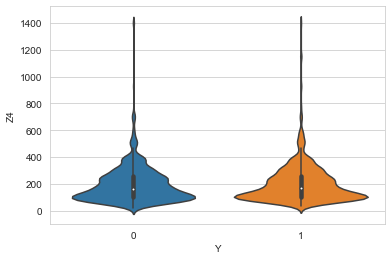

In [73]:
sns.violinplot(x=datatrain.Y , y=datatrain.Z4)

### Scatter Plot

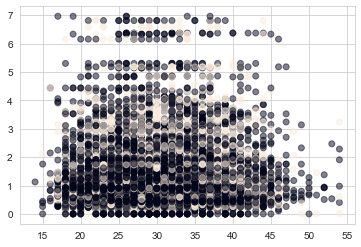

In [54]:
plt.scatter(datatrain['X2'], datatrain['Z1'], alpha=0.5, c=datatrain['Y'])
plt.show()

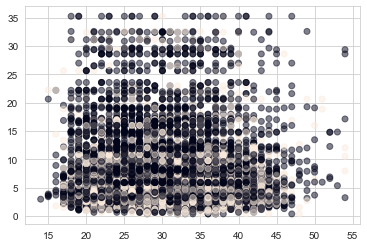

In [55]:
plt.scatter(datatrain['X2'], datatrain['Z2'], alpha=0.5, c=datatrain['Y'])
plt.show()

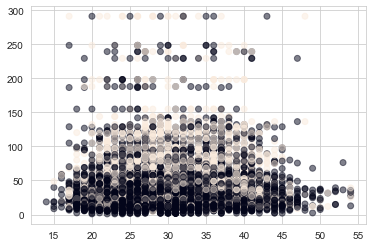

In [56]:
plt.scatter(datatrain['X2'], datatrain['Z3'], alpha=0.5, c=datatrain['Y'])
plt.show()

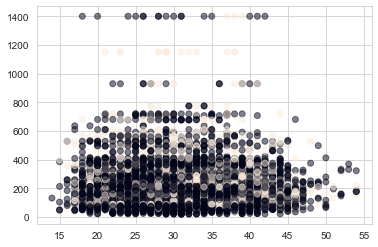

In [57]:
plt.scatter(datatrain['X2'], datatrain['Z4'], alpha=0.5, c=datatrain['Y'])
plt.show()

Kelas 0 memiliki data 44.17% Lebih banyak daripada kelas 1